In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preprocessing**

## **Exploratory Data Analysis**

In [ ]:
import os, glob

path = "/content/drive/MyDrive/Normal _ Stroke Patient Details"

def segragating_types(path):
  mapping_dataset = {}
  for dir in os.listdir(path):
    if 'Normal' in dir:
      if 'Normal' not in mapping_dataset.keys():
        mapping_dataset["Normal"] = []
      mapping_dataset["Normal"].append(dir)

    if 'Haemorrhagic' in dir:
      if 'Haemorrhagic' not in mapping_dataset.keys():
        mapping_dataset["Haemorrhagic"] = []
      mapping_dataset["Haemorrhagic"].append(dir)

    if 'Ischmic'  in dir or 'Ischemic' in dir:
      if 'Ischemic' not in mapping_dataset.keys():
        mapping_dataset["Ischemic"] = []
      mapping_dataset["Ischemic"].append(dir)

  return mapping_dataset

mapping_dataset = segragating_types(path)


In [ ]:
mapping_dataset

{'Ischemic': ['Ellappan_Stroke_Ischemic',
  'Ganga Pushbam_Stroke_Ischemic',
  'Ramachandran_Stroke_Ischmic',
  'Amina_Stroke_Ischemic',
  'Anbazhgan_Stroke_Ischemic',
  'New_Ischemic_Stroke'],
 'Haemorrhagic': ['Kuppusamy_Stroke_Haemorrhagic',
  'Shamshath_Stroke_Haemorrhagic',
  'Venda_Stroke_Haemorrhagic',
  'Manjula_Stroke_Haemorrhagic',
  'Prabhakar Rao_Stroke_Haemorrhagic'],
 'Normal': ['Poornima_Normal',
  'Salini_Normal',
  'Pavithra_Normal',
  'Chitra_Normal',
  'Bushan Yadav_Normal',
  'Karnamoorthi_Normal']}

In [ ]:
import shutil
def move_files_to_root_folder(old, new, mapping_dataset):

  for key in mapping_dataset.keys():
    for subdir in mapping_dataset[key]:
      try:
        shutil.copytree(f"{old}/{subdir}",f'{new}/{key}/{subdir}')
      except Exception as e:
        print(e)

move_files_to_root_folder(path, "/content/drive/MyDrive/Dataset_MRI_Folder", mapping_dataset)

{'Ischemic': 171, 'Haemorrhagic': 186, 'Normal': 399}


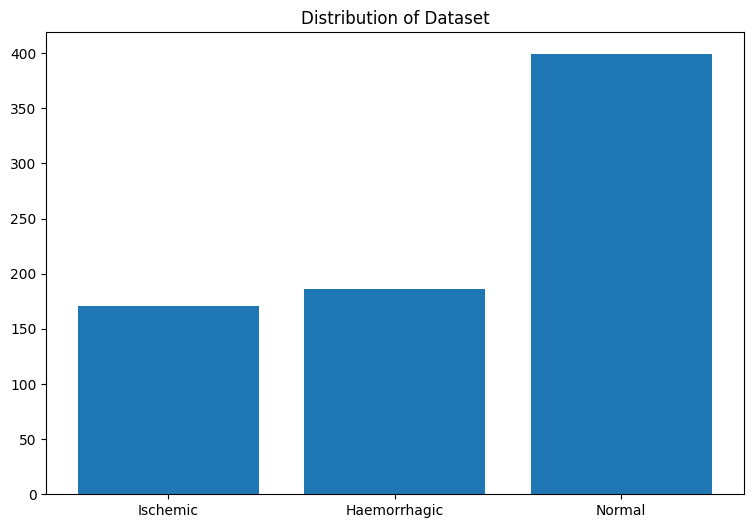

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

class_names = mapping_dataset.keys()
nimgs = {}
root_path = "/content/drive/MyDrive/Dataset_MRI_Folder"
for i in class_names:
  nimages = len(glob.glob(f'{root_path}/{i}/**/*.jpg', recursive=True))

  nimgs[i] = nimages

print(nimgs)
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of Dataset')
plt.show()


## **Visualizing the Dataset**

In [ ]:
import numpy as np
import cv2

def enhance_contrast(image_matrix, bins=256):
    image_flattened = image_matrix.flatten()
    image_hist = np.zeros(bins)

    # frequency count of each pixel
    for pix in image_matrix:
        image_hist[pix] += 1

    # cummulative sum
    cum_sum = np.cumsum(image_hist)
    norm = (cum_sum - cum_sum.min()) * 255
    # normalization of the pixel values
    n_ = cum_sum.max() - cum_sum.min()
    uniform_norm = norm / n_
    uniform_norm = uniform_norm.astype('int')

    # flat histogram
    image_eq = uniform_norm[image_flattened]
    # reshaping the flattened matrix to its original shape
    image_eq = np.reshape(a=image_eq, newshape=image_matrix.shape)

    return image_eq

In [ ]:
import cv2

def apply_enhancement(img):
  mask = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY)[1][:,:,0]
  dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
  a_img =enhance_contrast(dst)
  return a_img


def visualize(image_path, class_name, enhancement=False):
  plt.figure(1,figsize=[20, 3])

  # plt.axis('off')
  n = 0
  for i in range(8):
    n += 1
    plt.suptitle(class_name, fontsize=34)
    img = cv2.imread(image_path[i])
    if enhancement:
      img = apply_enhancement(img)
    plt.subplot(1, 8, n)
    plt.imshow(img)

    plt.title(os.path.dirname(image_path[i]).split("/")[-1])
    plt.axis('off')
  return plt

def plot_images(class_names, enhancement=False):
  image_path = []
  for c in range(len(class_names)):
    image_path = glob.glob(f'{root_path}/{class_names[c]}/**/*.jpg', recursive=True)
    # fig = plt.figure()
    # fig.suptitle(class_names[c])
    visualize(image_path, class_names[c], enhancement).show()



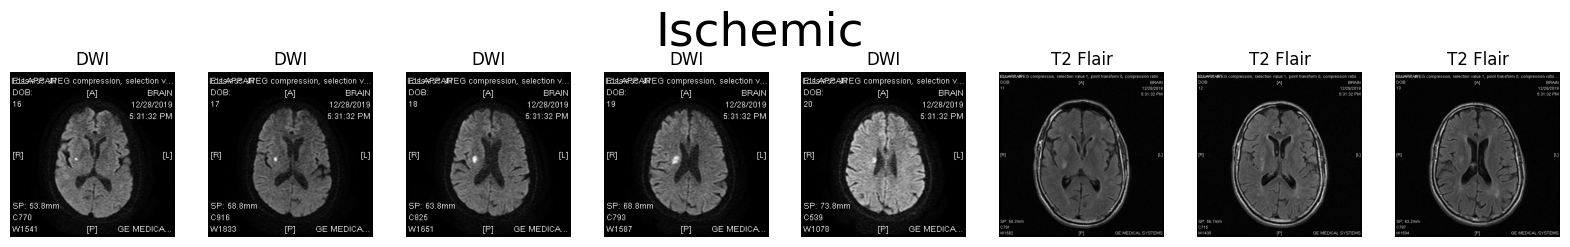

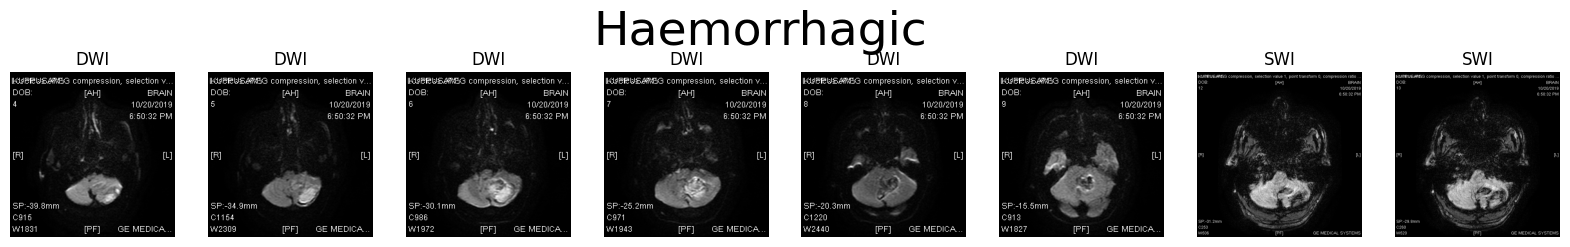

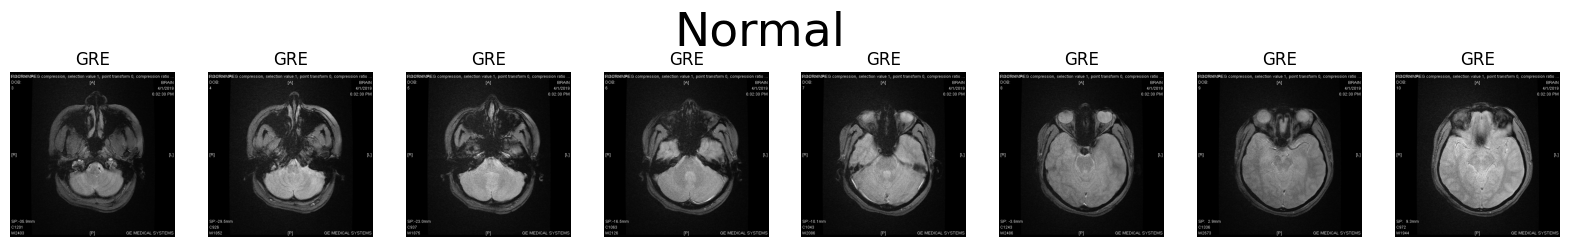

In [ ]:
plot_images(list(mapping_dataset.keys()))

### Visualizing through Scatter plot

#### 2 Dimension

In [ ]:
images = glob.glob(f"/content/drive/MyDrive/Dataset_MRI_Folder/**/*.jpg", recursive=True)
def read_resize(img):
  img = cv2.imread(img)
  return cv2.resize(img, (256, 256))
Data = [np.array(read_resize(img)) for img in images]
Data = np.asarray(Data)



In [ ]:
len(images)

target =  []

for img in images:
  if 'Haemorrhagic' in img:
    target.append(0)
  elif 'Ischemic' in img:
    target.append(1)
  elif 'Normal' in img:
    target.append(2)

In [ ]:
Data = Data.flatten().reshape(756, 196608)
Data.shape

(756, 196608)

In [ ]:
#Import required modules
from sklearn.decomposition import PCA

pca = PCA(2) # we need 2 principal components.
converted_data = pca.fit_transform(Data)

converted_data.shape

(756, 2)

<ipython-input-44-96cda3d78e4a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-44-96cda3d78e4a>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


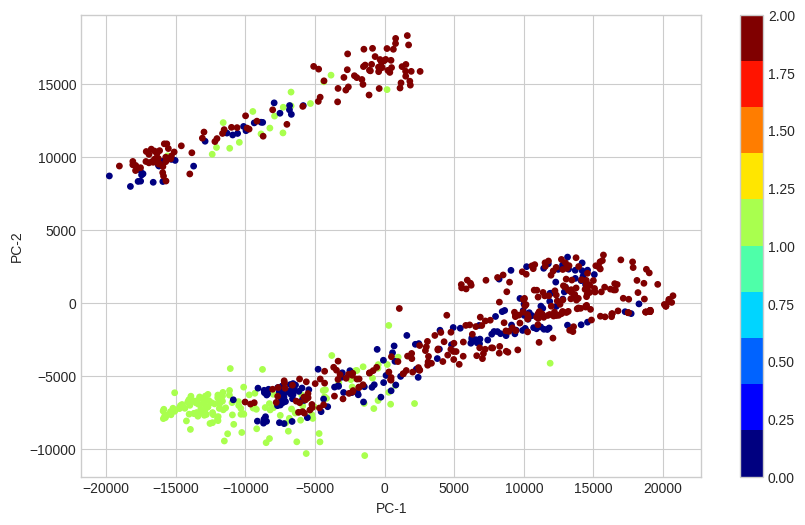

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = np.array(target))
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

#### 3 Dimension

In [ ]:
#Import required modules
from sklearn.decomposition import PCA

pca = PCA(3) # we need 3 principal components.
converted_data = pca.fit_transform(Data)

converted_data.shape

(756, 3)

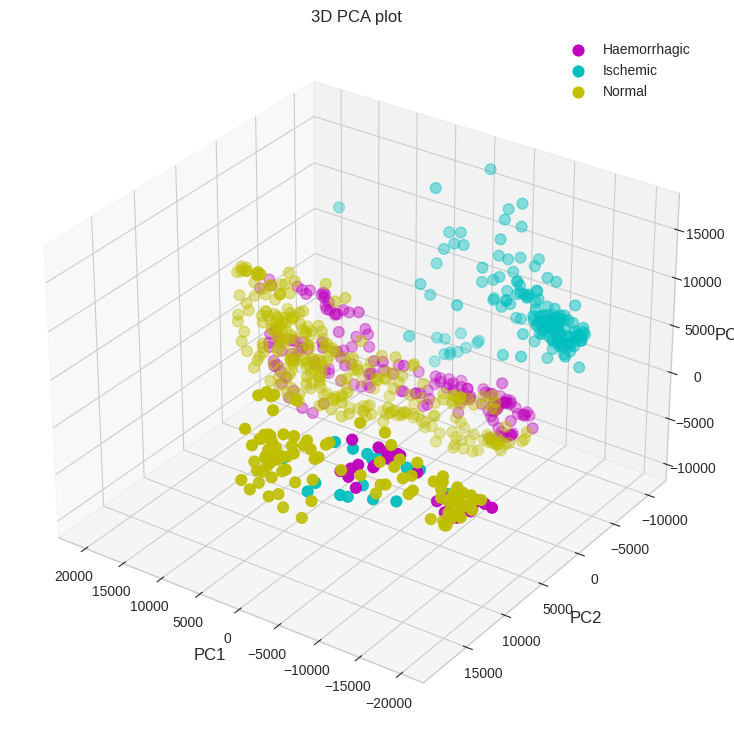

In [ ]:
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111,
                     projection='3d')

c_dict = {0: "m", 1: "c", 2:"y"}
label = {0: "Haemorrhagic", 1: "Ischemic", 2:"Normal"}
for l in np.unique(target):
 ix=np.where(target==l)
 ax.scatter(converted_data[:, 0][ix],
            converted_data[:, 1][ix],
            converted_data[:, 2][ix],
            c=c_dict[l],
            s=60,
           label=label[l])

ax.set_xlabel("PC1",
              fontsize=12)
ax.set_ylabel("PC2",
              fontsize=12)
ax.set_zlabel("PC3",
              fontsize=12)

ax.view_init(30, 125)
ax.legend()
plt.title("3D PCA plot")
plt.show()

## **Preprocessing the Dataset**

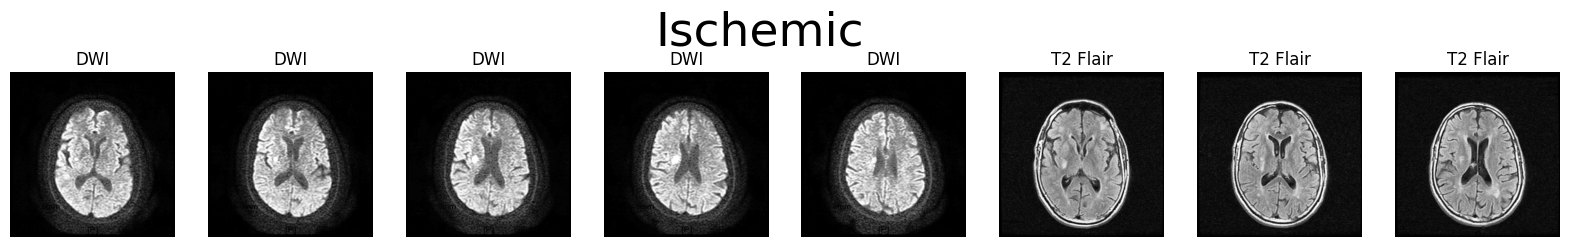

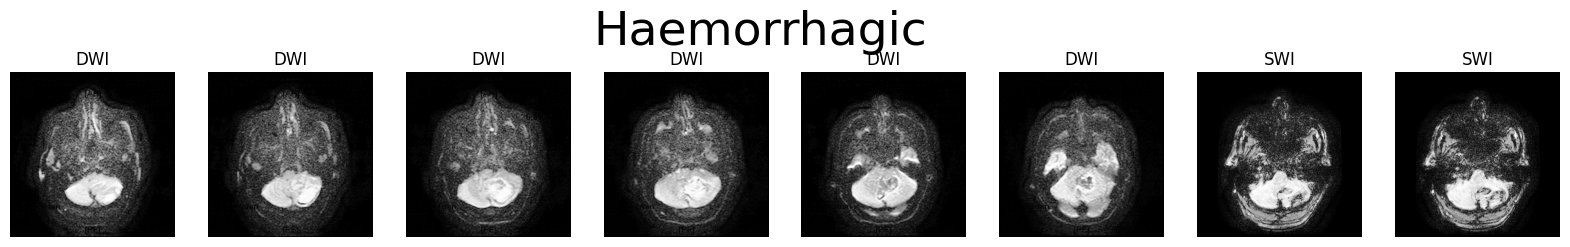

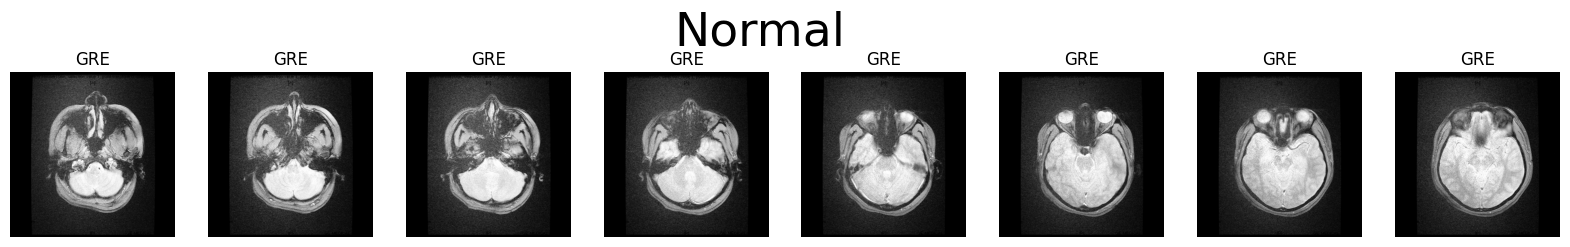

In [ ]:
plot_images(list(mapping_dataset.keys()), True)

## **Exporting Dataset**

In [ ]:
def move_images_to_train_folder(path, new_path, class_names):
  for class_name in class_names:
    try:
      os.makedirs(f"{new_path}/{class_name}")
    except Exception as e:
      print(e)
    i = 0
    for img_path in glob.glob(f"{path}/{class_name}/**/*.jpg", recursive=True):
      i+=1
      img_base_name = os.path.basename(img_path)
      img = cv2.imread(img_path)
      img = apply_enhancement(img)
      cv2.imwrite(f"{new_path}/{class_name}/{img_base_name}_{class_name}_{i}.png", img)

move_images_to_train_folder(root_path,"/content/drive/MyDrive/Stroke_classification", list(mapping_dataset.keys()) )



In [ ]:
len(os.listdir("/content/drive/MyDrive/Stroke_classification/Haemorrhagic"))

186

In [ ]:
len(os.listdir("/content/drive/MyDrive/Stroke_classification/Ischemic"))

30

In [ ]:
len(os.listdir("/content/drive/MyDrive/Stroke_classification/Normal"))

399